## Problem statement



To predict churning out customers 

We are going to implement the RandomForestClassifier to customer churn dataset and interpret churning 


## Load the dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
# churn_data=pd.read_csv('Customer_churn.csv')

from google.colab import drive
drive.mount('/content/drive')

churn_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intellipaat/Weekend_ML_Batch/Decision_Trees/customer_churn-2.csv")


Mounted at /content/drive


In [3]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Converting the Total charges column to numeric,because as you can see its original dtype is object but data is numeric

In [6]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
churn_data['TotalCharges']=pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

In [10]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Missing Value Analysis

In [ ]:
churn_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
churn_data.shape

(7043, 21)

As we can see from above output Total charges is having 11 null values ,as we don't have a appropriate TotalCharges we will be dropping the 11 null value rows in the same data table

In [11]:
churn_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
churn_data.dropna(inplace=True)

In [13]:
churn_data.shape

(7032, 21)

As CustomerId is nowhere helping in the prediction and also it's values are not appropriate to fit in the model we will be droping the Customer ID column

In [14]:
churn_data.drop(columns = ['customerID'],inplace = True)

In [15]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Label Encoding

Encoding all the labels as numerical categories as because this kinds of string data cannot be used to fit as these are incompatible type to fit the classification model

this can be performed through label_encoder() or using the map() function.

In [17]:

churn_data['Partner'] = churn_data['Partner'].map({'Yes': 1, 'No': 0})
churn_data['Dependents'] = churn_data['Dependents'].map({'Yes': 1, 'No': 0})
churn_data['MultipleLines']=churn_data['MultipleLines'].map({'No phone service':0, 'No': 1, "Yes": 2})
churn_data['InternetService']=churn_data['InternetService'].map({'DSL':0, 'Fiber optic':1, 'No':2})
churn_data['OnlineSecurity']=churn_data['OnlineSecurity'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['OnlineBackup']=churn_data['OnlineBackup'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['DeviceProtection']=churn_data['DeviceProtection'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['TechSupport']=churn_data['TechSupport'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['StreamingTV']=churn_data['StreamingTV'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['StreamingMovies']=churn_data['StreamingMovies'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['Contract']=churn_data['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
churn_data['PaperlessBilling']=churn_data['PaperlessBilling'].map({'Yes':1, 'No':0})
churn_data['PaymentMethod']=churn_data['PaymentMethod'].map({'Electronic check':1, 'Mailed check':0, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})
churn_data['gender'] = churn_data['gender'].map({'Female': 1, 'Male': 0})
churn_data['PhoneService'] = churn_data['PhoneService'].map({'Yes': 1, 'No': 0})



In [23]:
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,29.85,29.85,No
1,0,0,0,0,34,1,1,0,1,0,1,0,0,0,1,0,0,56.95,1889.50,No
2,0,0,0,0,2,1,1,0,1,1,0,0,0,0,0,1,0,53.85,108.15,Yes
3,0,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,No
4,1,0,0,0,2,1,1,1,0,0,0,0,0,0,0,1,1,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,2,0,1,0,1,1,1,1,1,1,0,84.80,1990.50,No
7039,1,0,1,1,72,1,2,1,0,1,1,0,1,1,1,1,3,103.20,7362.90,No
7040,1,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,1,29.60,346.45,No
7041,0,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,0,74.40,306.60,Yes


So now after encoding you can check that the dtypes of all the data is numerical where this data fits into any classification probelm perfecty

## Data Visualization

###### 1

Starting with visualizing how many customers have churned out and how many are still in contract with the company

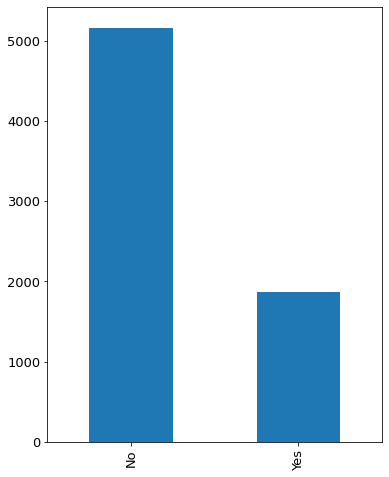

In [26]:
churn_data["Churn"].value_counts().plot(kind='bar', figsize=(6, 8), fontsize=13)

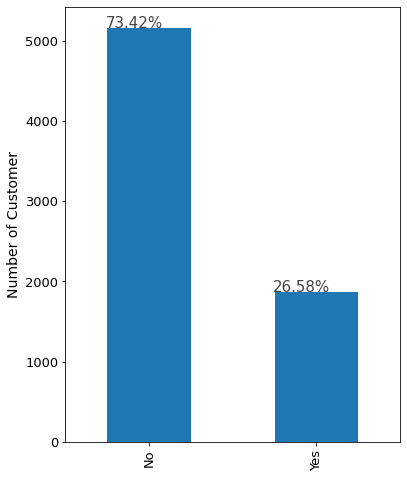

In [25]:
import matplotlib.pyplot as plt
ax = churn_data["Churn"].value_counts().plot(kind='bar', figsize=(6, 8), fontsize=13)
ax.set_ylabel("Number of Customer", fontsize=14);

totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='#444444')
plt.show()

from the above visualization its  clear that 26.58 % of people have churned out and 73.43% people have not churned.

##### 2

1st scatter plot

from this 1st scatter plot we can infer that , more the  tatal charge ,and higher the tenure, less the churning rate

because as from visualization the more people are churned out are the one's with less total charge and less tenure 


2nd  scatter plot

from this 2nd scatter plot we can infer that , more the  montly charge ,and higher the tenure, less the churning rate.

because as from visualization the more people are churned out are the one's with less mothly charge and less tenure 

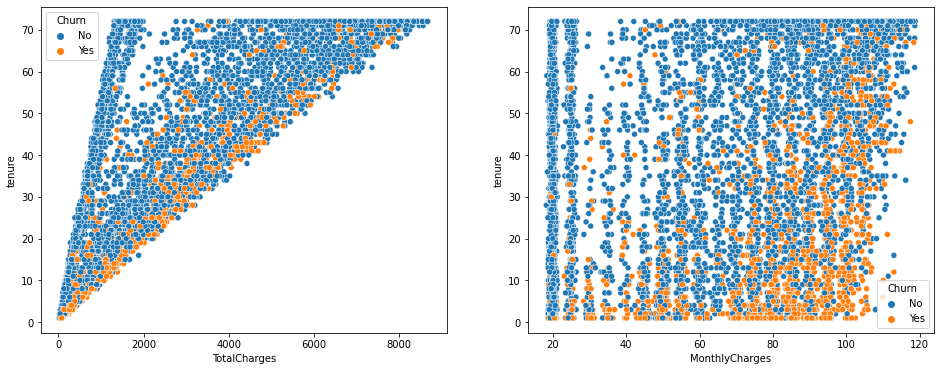

In [27]:
import seaborn as sns
_, ax = plt.subplots(1, 2, figsize= (16, 6))
sns.scatterplot(x="TotalCharges", y = "tenure" , hue="Churn", data=churn_data, ax=ax[0])
sns.scatterplot(x="MonthlyCharges", y = "tenure" , hue="Churn", data=churn_data, ax=ax[1])

##### 3

there is same inference with Facetgrid also.

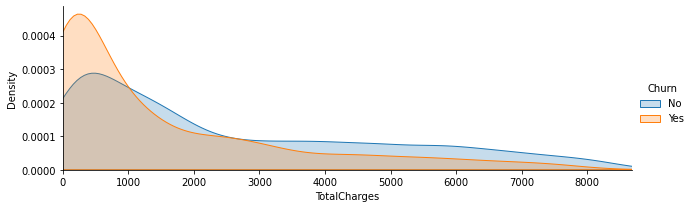

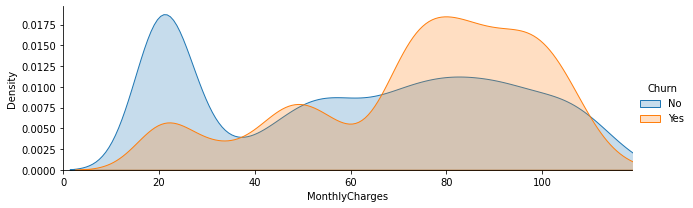

In [28]:
facet = sns.FacetGrid(churn_data, hue = "Churn", aspect = 3)
facet.map(sns.kdeplot,"TotalCharges",shade= True)
facet.set(xlim=(0, churn_data["TotalCharges"].max()))
facet.add_legend()

facet = sns.FacetGrid(churn_data, hue = "Churn", aspect = 3)
facet.map(sns.kdeplot,"MonthlyCharges",shade= True)
facet.set(xlim=(0, churn_data["MonthlyCharges"].max()))
facet.add_legend()

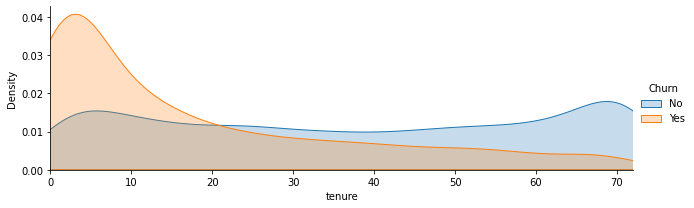

In [29]:
facet = sns.FacetGrid(churn_data, hue = "Churn", aspect = 3)
facet.map(sns.kdeplot,"tenure",shade= True)
facet.set(xlim=(0, churn_data["tenure"].max()))
facet.add_legend()

##### 4

from the below heatmap we can check the correlation between the features

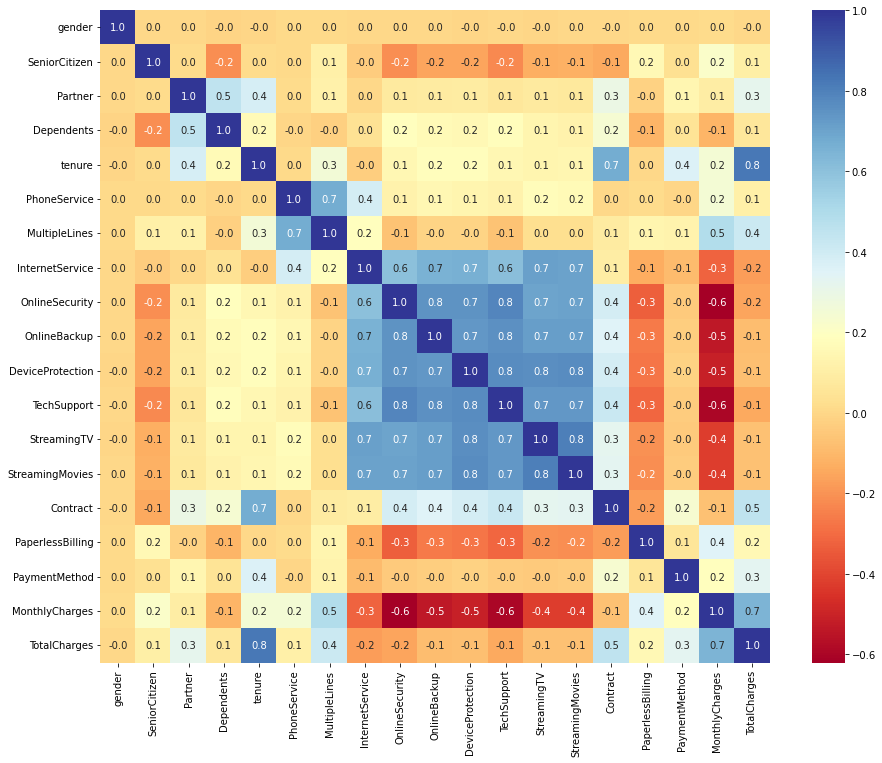

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15, 12))
sns.heatmap(churn_data.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

we can infer that there are hightly_corr_feature = ["OnlineBackup_No internet service", "StreamingMovies_No internet service", "StreamingTV_No internet service", "TechSupport_No internet service", "DeviceProtection_No internet service", "OnlineSecurity_No internet service"]

# Model building 

Firstly we'll map the churn column with 1 and 0 instead od 0yes and no so that all the features and label  will have uniform datatype

In [32]:
churn_data['Churn'] = churn_data['Churn'].map({'Yes': 1, 'No': 0})

As our main prediction is to check the churning out customers ,so we consider churn as depended data and all other features are considered as independent (features after feature selection)

In [33]:
X = churn_data.iloc[:, :-1].values
y = churn_data.iloc[:, -1].values

Splitting the data into train and test data ,as training data will be used for training the model and test data is for prediction.

In [34]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

Now we will fit the data into RandomForestClassifier ,As random forest is  ensemble method .we will be importing RandomForestClassifier from sklearn's ensemble library

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)



In [36]:
rf1=rf.fit(x_train,y_train) 

Checking for prediction for the above fit model

In [37]:
y_pred=rf1.predict(x_test)

From the prediction result(predicted values) and test value(actual value ) we'll check the model efficiency

In [38]:
accuracy_score(rf1.predict(x_train),y_train)

0.9978666666666667

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7953091684434968

from the above accuracy we can infer that the model is having 78.39% accuracy that is out of 100 predictions we'll be getting 78 predictions as true prediction

# Hyper parameter tuning

**Hyper-parameters**  are parameters that define the model structure, and **tuning** hyper-parameters is the process of finding the best model structure. So that model  structure makes the model more efficient

There are many parameters which we can look into while building the randomforest model they are:

**bootstrap'/max_sample:** The max_samples hyperparameter determines what fraction of the original dataset is given to any individual tree

**'max_depth':** The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node

**'max_features':** This resembles the number of maximum features provided to each tree in a random forest. 

**'min_samples_leaf':** This Random Forest hyperparameter specifies the minimum number of samples that should be present in the leaf node after splitting a node.

**'min_samples_split':** parameter that tells the decision tree in a random forest the minimum required number of observations in any given node in order to split it. 

**'n_estimators':**
number of decision trees to choose while fitting the random forest model

There are two techniques for hyper parameter tuning :
    1.RandomizedSearchCV
    2.GridSearchCV
    
For our model we will be implementing  RandomizedSearchCV method and tune our model

So we'll select the best values for each parameter ,below code help's  us to extract the best values for each parameter

In [42]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Steps to implement:
    

1.Use the random grid to search for best hyperparameters
2.First create the base model to tune
3.Random search of parameters, using 3 fold cross validation
4.search across 100 different combinations, and use all available cores
5.Fit the random search model

In [41]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf2=rf_random.fit(x_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


from the above fitted model you can check the best values for each parameter across 10o folds

In [ ]:
rf2.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

So after hyperparameter tuning ,we have fitted the model with best parameters and the best value.

lets check the predictions for the model fitted after tuning

In [ ]:
y_pred=rf2.predict(x_test)

So from the below outup we can see there is a 1.28% change in accuracy .

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7967306325515281

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(rf2.predict(x_train),y_train)

0.8552888888888889

after implementation of  hyper parameter tuning to the model, we can see that there is increase in performance of the model

# Model Evaluation

We'll check the feature importance of the fitted model .where feature importance helps the contribution of each and every features for the built model

In [ ]:
importance = rf1.feature_importances_

In [ ]:
importance= pd.Series(importance)
importance

0     0.022110
1     0.022763
2     0.020210
3     0.159143
4     0.025974
5     0.022008
6     0.038735
7     0.028005
8     0.023810
9     0.041591
10    0.019668
11    0.020940
12    0.095651
13    0.025034
14    0.051460
15    0.183004
16    0.199894
dtype: float64

In [ ]:
df=pd.DataFrame(columns=['Feature','Importance'])

In [ ]:
df['Feature']=col_list
df['Importance']=importance

In [ ]:
df

,Feature,Importance
0,SeniorCitizen,0.022110
1,Partner,0.022763
2,Dependents,0.020210
3,tenure,0.159143
4,MultipleLines,0.025974
5,InternetService,0.022008
6,OnlineSecurity,0.038735
7,OnlineBackup,0.028005
8,DeviceProtection,0.023810
9,TechSupport,0.041591


In [ ]:
df.sort_values(by='Importance', ascending=False)

,Feature,Importance
16,TotalCharges,0.199894
15,MonthlyCharges,0.183004
3,tenure,0.159143
12,Contract,0.095651
14,PaymentMethod,0.051460
9,TechSupport,0.041591
6,OnlineSecurity,0.038735
7,OnlineBackup,0.028005
4,MultipleLines,0.025974
13,PaperlessBilling,0.025034


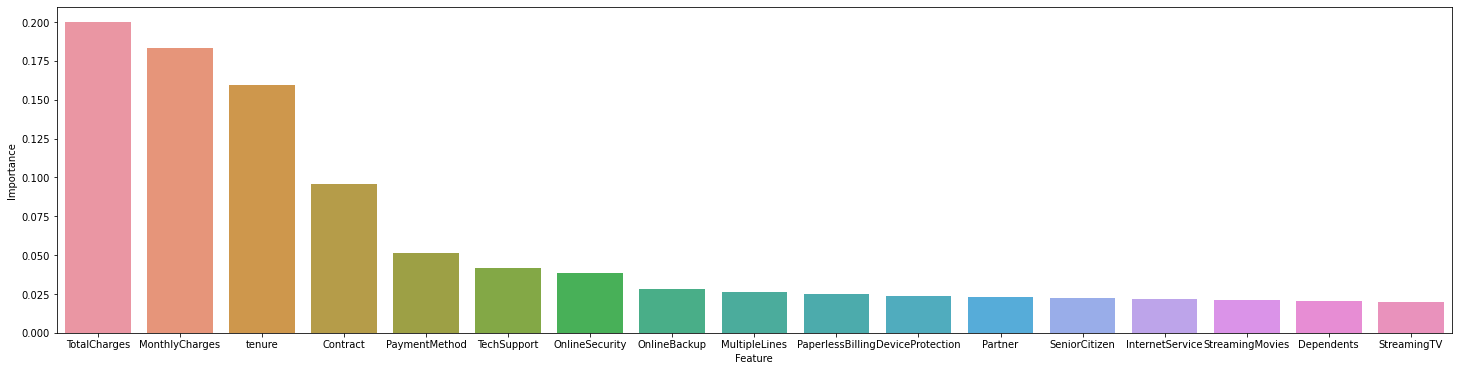

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(25,6))
# make barplot and sort bars
sns.barplot(x='Feature',y="Importance",data=df, order=df.sort_values('Importance', ascending=False).Feature)

From the above  plot we can infer that there is only few colums which have more contribution for prediction

### classification_report


classification_report helps us to evaluate the model

There are four ways to check the predictions
True Negative: the case was negative and predicted negative
True Positive: the case was positive and predicted positive
False Negative: the case was positive but predicted negative
False Positive: the case was negative but predicted positive
    
    
    
Precision:- Accuracy of positive predictions.
Precision = TP/(TP + FP)

Recall:- Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)


F1 score:- What percent of positive predictions were correct
F1 score = 2*(Recall * Precision) / (Recall + Precision)

Support:-Support is the number of actual occurrences of the class in the specified dataset

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1038
           1       0.61      0.50      0.55       369

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



so from classification_report we can evaluate the model performence in micro level